[0, 0]
x [[0.33333333 0.66666667]]
x [[0.55555556 1.11111111]]
x [[1.21297801 0.57695537]]
x [[0.61221134 0.83674636]]
x [[0.67805496 0.9684336 ]]
x [[0.26104536 1.12206872]]
x [[0.53435421 0.9591346 ]]
Tolerance reached
x [[0.55386343 0.99815304]]
Tolerance reached
x [[0.32765365 1.10097566]]
Tolerance reached
x [[0.4781299  1.02103516]]
Tolerance reached


C:\Users\perdorues\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arccos
  if sys.path[0] == '':


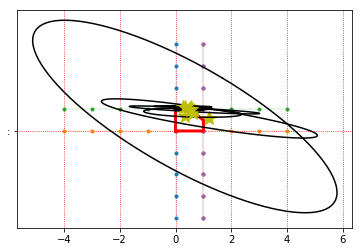

x 0.4781298953504046 1.0210351618502864 [array([[0.33333333, 0.66666667]]), array([[0.55555556, 1.11111111]]), array([[1.21297801, 0.57695537]]), array([[0.61221134, 0.83674636]]), array([[0.67805496, 0.9684336 ]]), array([[0.26104536, 1.12206872]]), array([[0.53435421, 0.9591346 ]]), array([[0.55386343, 0.99815304]]), array([[0.32765365, 1.10097566]]), array([[0.4781299 , 1.02103516]])]


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi, cos, sin

def plot_ellipse(xc,P):
    #P = np.linalg.inv(P)
    eigenW, eigenV = np.linalg.eig(P)
    random = np.matrix([[1, 0]])
    vektorResult = np.dot(P, np.transpose(random))
    helpFaktor = np.linalg.norm(vektorResult) * np.linalg.norm(random)
    rad = np.radians((np.dot(random, vektorResult) * helpFaktor)[0, 0])
    rotate = np.arccos(rad)
    c, s = np.cos(rotate), np.sin(rotate)
    R = np.array(((c, -s), (s, c)))
    #a = (R * eigenV[0])[0, 0]
    #b = (R * eigenV[1])[0, 1]
    b = eigenW[0]
    a = eigenW[1]
    u,v = xc
    t = np.linspace(0, 2*pi, 100)
    Ell = np.array([a*np.cos(t) , b*np.sin(t)])
         #u,v removed to keep the same center location
         #2-D rotation matrix

    Ell_rot = np.zeros((2,Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = np.dot(R,Ell[:,i])

    # plt.plot( u+Ell[0,:] , v+Ell[1,:] )     #initial ellipse
    plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'black',':' )    #rotated ellipse
    plt.grid(color='red',linestyle=':')
    #plt.hold(True)

def inside(x,A,b):
    x = np.dot(A,np.transpose(x))
    for i in range(np.shape(x)[0]):
        if x[i]> b[i]:
            return False
    return True

def finished(x,A,b):
    x = np.dot(A, np.transpose(x))
    for i in range(np.shape(x)[0]):
        if x[i] == b[i]:
            print("finished")
            return True
    return False
A = np.array([[-1,0],[0,-1],[1,0],[0,1],[1,1]])
b = np.array([[0,0,1,1,1.5]])
b = np.reshape(b,(5,1))
c = np.array([[-1,-2]])
c = np.reshape(c,(2,1))
x = np.array([[0,0]])
x = np.reshape(x,(2,1))

P = np.array([[5,0],[0,5]])
x = (0,0)

constraint1 = [0 for i in range(2)]
print(constraint1)
plt.plot([0,0,0,0,0,0,0,0,0],[-4,-3,-2,-1,0,1,2,3,4],'.-',lw='0.2' )    #rotated ellipse
plt.plot([-4,-3,-2,-1,0,1,2,3,4],[0,0,0,0,0,0,0,0,0],'.-',lw='0.2' )
plt.plot([-4,-3,-2,-1,0,1,2,3,4],[1,1,1,1,1,1,1,1,1],'.-',lw='0.2' )
plt.plot([1,1,1,1,1,1,1,1,1],[-4,-3,-2,-1,0,1,2,3,4],'.-',lw='0.2' )
plt.plot([1,1,1,1,1,1,1,1,1],[-4,-3,-2,-1,0,1,2,3,4],'.-',lw='0.2' )
plt.plot([1,0.5],[0.5,1],'.-',lw='0.2' )

plt.plot([0, 0, 0.5, 1, 1, 0], [0, 1, 1, 0.5, 0, 0], color='red',lw='3')
#plt.plot([0 for i in range(10000)] )    #rotated ellipse
#plt.grid(color='lightgray',linestyle='--')
#plt.hold(True)
#plt.show()
my_xs = []
for i in range(10):
    w = 0
    if inside(x,A,b):
        w = c
    else:
        for i in range(5):
            result = np.dot(A[i],np.transpose(x))
            if result>b[i] :
                w = A[i]
                break
    help = np.dot(np.transpose(w), P)
    help = np.dot(help, w)
    faktor = 1 / (2 + 1)
    multi = np.dot(P, w) / np.sqrt(help)
    multi = np.reshape(multi, (1, 2))
    x = x - faktor * multi
    print("x",x)
    my_xs.append(x)
    #print("P",P)
    faktorMatrix = 4 / (3)
    term = np.dot(np.transpose(w), P)
    termUpper = np.dot(w, term)
    termUpper = np.dot(P, termUpper)
    termLower = np.dot(term, w)
    P = faktorMatrix * (P - 2 / 3 * termUpper / termLower)
    if finished(x,A,b) :
        break;
    plot_ellipse((x[0, 0], x[0, 1]), P)
    plt.plot(x[0, 0], x[0, 1],'y*',ms=15)
    
    if len(my_xs) >= 7:
        if np.linalg.norm(my_xs[-1]-my_xs[-2]) >= 0.0017:
            print('Tolerance reached')

plt.show()
print("x", x[0, 0], x[0, 1],my_xs)